In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from intent_classification_helper import *

In [2]:
medical_train = pd.read_csv('/content/drive/MyDrive/nlp_datasets/medical-nlp/train.csv', error_bad_lines=False, 
                   engine='python', encoding='utf-8')
medical_train['description+text'] = medical_train['description'] + medical_train['text']
medical_train = medical_train.drop(columns=['description', 'text'])

medical_test = pd.read_csv('/content/drive/MyDrive/nlp_datasets/medical-nlp/test.csv', error_bad_lines=False, 
                   engine='python', encoding='utf-8')
medical_test['description+text'] = medical_test['description'] + medical_test['text']
medical_test = medical_test.drop(columns=['description', 'text'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# encode label
onehot_encoder = OneHotEncoder()
y_train = onehot_encoder.fit_transform(medical_train['label'].values.reshape(-1, 1)).todense()
y_test = onehot_encoder.fit_transform(medical_test['label'].values.reshape(-1, 1)).todense()

In [4]:
# preprocess text
print('Preprocessing text on training set...')
preprocess_text(medical_train, 'description+text', to_lowercase=False, customized_stopwords='/content/drive/MyDrive/nlp_datasets/medical-nlp/clinical-stopwords.txt')
preprocess_text(medical_test, 'description+text', to_lowercase=False, customized_stopwords='/content/drive/MyDrive/nlp_datasets/medical-nlp/clinical-stopwords.txt')

Preprocessing text on training set...


Start text preprocessing: 
--------------------------
Removing html tags...
--------------------------
Removing nonword characters...
--------------------------
Removing stopwords...
Text preprocessing completed.




Start text preprocessing: 
--------------------------
Removing html tags...
--------------------------
Removing nonword characters...
--------------------------
Removing stopwords...
Text preprocessing completed.




In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

def rf_tf_idf(feature_numbers=[40, 100, 200, 500, 1000], vocabulary=None):
  
  # try different number of features
  for feature_number in feature_numbers:  
    tv = TfidfVectorizer(max_df=1.0, min_df=0, max_features=feature_number, vocabulary=vocabulary)
    
    x_train = medical_train['description+text'].tolist()
    x_test = medical_test['description+text'].tolist()

    tv.fit(x_train)
    x_train = tv.transform(x_train).toarray()
    x_test = tv.transform(x_test).toarray()

    vocab = tv.get_feature_names_out()

    print('TF-IDF vocabulary size: ', len(vocab))
    #print(pd.DataFrame(x_train, columns=vocab))
    
    model = random_foreset_classifier(x_train=x_train, y_train=y_train, num_features=len(vocab), n_estimators=200, max_depth=None, saving=False)
    evaluate_model(model=model, name='random_forest_{}_features_n_estimators=200_max_depth=None'.format(len(vocab)), x_test=x_test, y_test=y_test, num_features=len(vocab),
                   path='/content/drive/MyDrive/nlp_datasets/medical-nlp/models', filename='evaluation_rf_custom_vocab.csv')

    print()
    if feature_number < len(vocab):
      break

In [42]:
# max number of tf-idf features: 22546
feature_numbers = [40, 100, 200, 500, 1000, 2000, 5000, 10000, 15000, 20000, 25000]
rf_tf_idf(feature_numbers)

TF-IDF vocabulary size:  40


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_40_features_n_estimators=150_max_depth=None
accuracy score:  0.254
balanced accuracy score:  0.18083003073558926
weighted precision:  0.21081047052967525
weighted recall:  0.25399999999999995
weighted f1 score:  0.22923083112896375
macro f1 score:  0.16632409130988535

TF-IDF vocabulary size:  100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_100_features_n_estimators=150_max_depth=None
accuracy score:  0.37
balanced accuracy score:  0.2701715071520792
weighted precision:  0.3109310638392672
weighted recall:  0.37
weighted f1 score:  0.33122175276596794
macro f1 score:  0.25088366043913524



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  200


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_200_features_n_estimators=150_max_depth=None
accuracy score:  0.38
balanced accuracy score:  0.2893282663250284
weighted precision:  0.33548585202601383
weighted recall:  0.38
weighted f1 score:  0.3501164238011407
macro f1 score:  0.27693750511786097



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_500_features_n_estimators=150_max_depth=None
accuracy score:  0.374
balanced accuracy score:  0.2885994424715418
weighted precision:  0.34016092209856913
weighted recall:  0.374
weighted f1 score:  0.350664514130653
macro f1 score:  0.28051385580539057



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  1000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_1000_features_n_estimators=150_max_depth=None
accuracy score:  0.414
balanced accuracy score:  0.3370319792338141
weighted precision:  0.3820080860672312
weighted recall:  0.414
weighted f1 score:  0.38983264305985144
macro f1 score:  0.331234822478678



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  2000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_2000_features_n_estimators=150_max_depth=None
accuracy score:  0.44
balanced accuracy score:  0.3752749019883396
weighted precision:  0.41916227364185105
weighted recall:  0.44
weighted f1 score:  0.42077592580656714
macro f1 score:  0.371161241809002



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  5000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_5000_features_n_estimators=150_max_depth=None
accuracy score:  0.374
balanced accuracy score:  0.3125882632088785
weighted precision:  0.3485138609616204
weighted recall:  0.374
weighted f1 score:  0.35603010431334237
macro f1 score:  0.3064690556242038



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  10000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_10000_features_n_estimators=150_max_depth=None
accuracy score:  0.334
balanced accuracy score:  0.272063069148876
weighted precision:  0.309249649122807
weighted recall:  0.334
weighted f1 score:  0.31844883677112623
macro f1 score:  0.26608238239595894



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  15000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_15000_features_n_estimators=150_max_depth=None
accuracy score:  0.306
balanced accuracy score:  0.24579008267621327
weighted precision:  0.2845282237736072
weighted recall:  0.306
weighted f1 score:  0.2932366412142929
macro f1 score:  0.24029185925101976



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  20000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_20000_features_n_estimators=150_max_depth=None
accuracy score:  0.296
balanced accuracy score:  0.23177281434162164
weighted precision:  0.27135325477735117
weighted recall:  0.296
weighted f1 score:  0.2814818914072375
macro f1 score:  0.22480885782598897



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  22546


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_22546_features_n_estimators=150_max_depth=None
accuracy score:  0.29
balanced accuracy score:  0.23006210674856115
weighted precision:  0.2696313034840556
weighted recall:  0.29
weighted f1 score:  0.2780788817660654
macro f1 score:  0.2244878084222849



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




In [49]:
# max number of tf-idf features: 22546, n_estimators=200
feature_numbers = [40, 100, 200, 500, 1000, 2000, 5000, 10000, 15000, 20000, 25000]
rf_tf_idf(feature_numbers)

TF-IDF vocabulary size:  40


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_40_features_n_estimators=200_max_depth=None
accuracy score:  0.268
balanced accuracy score:  0.19486023810092887
weighted precision:  0.2282877551020408
weighted recall:  0.268
weighted f1 score:  0.24543865871485523
macro f1 score:  0.1814317232076824

TF-IDF vocabulary size:  100


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_100_features_n_estimators=200_max_depth=None
accuracy score:  0.364
balanced accuracy score:  0.25915169857425663
weighted precision:  0.2897737553233492
weighted recall:  0.364
weighted f1 score:  0.3167686595316811
macro f1 score:  0.23285241986508282



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  200


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_200_features_n_estimators=200_max_depth=None
accuracy score:  0.39
balanced accuracy score:  0.29859211814149755
weighted precision:  0.34687450175419265
weighted recall:  0.39
weighted f1 score:  0.3603191908417961
macro f1 score:  0.28730040938622453



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  500


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_500_features_n_estimators=200_max_depth=None
accuracy score:  0.394
balanced accuracy score:  0.31546415747710943
weighted precision:  0.3710185823249954
weighted recall:  0.394
weighted f1 score:  0.37649281991340927
macro f1 score:  0.3116766850989792



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  1000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_1000_features_n_estimators=200_max_depth=None
accuracy score:  0.406
balanced accuracy score:  0.3278423995504406
weighted precision:  0.37307408327233427
weighted recall:  0.406
weighted f1 score:  0.38115073590288245
macro f1 score:  0.3209375469759494



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  2000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_2000_features_n_estimators=200_max_depth=None
accuracy score:  0.448
balanced accuracy score:  0.38402933937202693
weighted precision:  0.42581918636613525
weighted recall:  0.448
weighted f1 score:  0.4284150264177496
macro f1 score:  0.38071187484335883



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  5000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_5000_features_n_estimators=200_max_depth=None
accuracy score:  0.376
balanced accuracy score:  0.30866233065369597
weighted precision:  0.34543379131889185
weighted recall:  0.376
weighted f1 score:  0.35427342378177257
macro f1 score:  0.3006927271232257



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  10000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_10000_features_n_estimators=200_max_depth=None
accuracy score:  0.328
balanced accuracy score:  0.2641175832622136
weighted precision:  0.30223824140803834
weighted recall:  0.328
weighted f1 score:  0.31182642684004136
macro f1 score:  0.2577012725029764



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  15000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_15000_features_n_estimators=200_max_depth=None
accuracy score:  0.3
balanced accuracy score:  0.2367951126046107
weighted precision:  0.2780505594914325
weighted recall:  0.3
weighted f1 score:  0.2867396948516272
macro f1 score:  0.23125860652644273



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  20000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_20000_features_n_estimators=200_max_depth=None
accuracy score:  0.292
balanced accuracy score:  0.23205941237511665
weighted precision:  0.270816416577367
weighted recall:  0.292
weighted f1 score:  0.2796960970064418
macro f1 score:  0.2266174917036986



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




TF-IDF vocabulary size:  22546


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_22546_features_n_estimators=200_max_depth=None
accuracy score:  0.296
balanced accuracy score:  0.23324217306948014
weighted precision:  0.2772643607281911
weighted recall:  0.296
weighted f1 score:  0.28532814941549334
macro f1 score:  0.22823727835799104



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.




/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


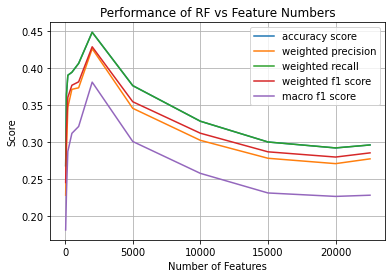

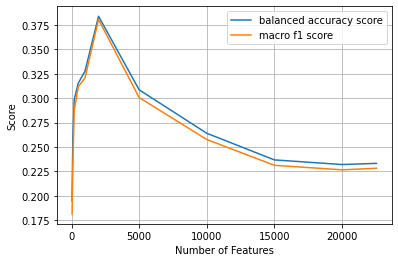

In [50]:
# plot the feature importance graph for random forest, n_estimators=200
plt.title('Performance of RF vs Feature Numbers')
plt.xlabel('Number of Features')
plt.ylabel('Score')

eval_path = '/content/drive/MyDrive/nlp_datasets/medical-nlp/models/evaluation_rf_3.csv'
eval_result = pd.read_csv(eval_path, error_bad_lines=False, engine='python', encoding='utf-8')

feature_numbers = eval_result['num_features'].to_list()
accuracy_scores = eval_result['accuracy score'].to_list()
balanced_accuracy_scores = eval_result['balanced accuracy score'].to_list()
weighted_precision = eval_result['weighted precision'].to_list()
weighted_recall = eval_result['weighted recall'].to_list()
weighted_f1_scores = eval_result['weighted f1 score'].to_list()
macro_f1_scores = eval_result['macro f1 score'].to_list()

plt.plot(feature_numbers, accuracy_scores, label='accuracy score')
plt.plot(feature_numbers, weighted_precision, label='weighted precision')
plt.plot(feature_numbers, weighted_recall, label='weighted recall')
plt.plot(feature_numbers, weighted_f1_scores, label='weighted f1 score')
plt.plot(feature_numbers, macro_f1_scores, label='macro f1 score')
plt.legend()
plt.grid()

plt.figure()
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.plot(feature_numbers, balanced_accuracy_scores, label='balanced accuracy score')
plt.plot(feature_numbers, macro_f1_scores, label='macro f1 score')

plt.legend()
plt.grid()
plt.show()

In [6]:
# test using the given vocabulary
fd = open('/content/drive/MyDrive/nlp_datasets/medical-nlp/vocab.txt', 'r')
lines = fd.readlines()

vocab = {}

index = 0

for line in lines:
  vocab[line.strip()] = index;
  index += 1

In [7]:
len(vocab)

69944

In [ ]:
# max number of tf-idf features: 22546, n_estimators=200, using the given vocabulary
rf_tf_idf(feature_numbers=[40], vocabulary=vocab) # usign customized vocubalary, feature_number parameter is ignored

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"


In [8]:
tv = TfidfVectorizer(max_df=1.0, min_df=0, vocabulary=vocab)
    
x_train = medical_train['description+text'].tolist()
x_test = medical_test['description+text'].tolist()

tv.fit(x_train)
x_train = tv.transform(x_train).toarray()
x_test = tv.transform(x_test).toarray()

model = random_foreset_classifier(x_train=x_train, y_train=y_train, num_features=len(vocab), n_estimators=200, max_depth=None, saving=False)
evaluate_model(model=model, name='random_forest_{}_features_n_estimators=200_max_depth=None'.format(len(vocab)), x_test=x_test, y_test=y_test, num_features=len(vocab),
                path='/content/drive/MyDrive/nlp_datasets/medical-nlp/models', filename='evaluation_rf_custom_vocab.csv')

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


evaluate the model:  random_forest_69944_features_n_estimators=200_max_depth=None
accuracy score:  0.252
balanced accuracy score:  0.18860203027769135
weighted precision:  0.23046966961229198
weighted recall:  0.252
weighted f1 score:  0.24014076642764778
macro f1 score:  0.18168983386230947
